In [1]:
import numpy as np
import pandas as pd 

dates = pd.date_range("2020-01-01", periods=48, freq='M')

timestamp = np.arange(len(dates))
trend_factor = timestamp * 1.1
cycle_factor = 10 * np.sin(np.linspace(0,3.14 * 2, 48))
seasonal_factor = 7 * np.sin(np.linspace(0,3.14*8, 48))
np.random.seed(2004)
irreguiar_factor = 2 * np.random.rand(len(dates))

df = pd.DataFrame({"timeseris" : trend_factor + cycle_factor + seasonal_factor +irreguiar_factor
                 , "trend" : trend_factor,
                 "cycle" : cycle_factor,
                 "seasonal" : seasonal_factor,
                 "irrgular" : irreguiar_factor},
                 index = dates)

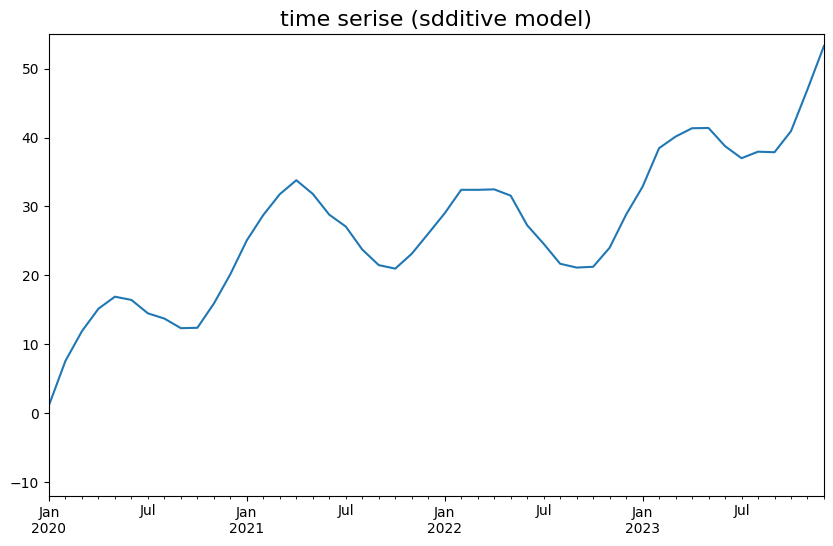

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10,6])
df.timeseris.plot()
plt.title("time serise (sdditive model)", fontsize = 16)
plt.ylim(-12,55)
plt.show()

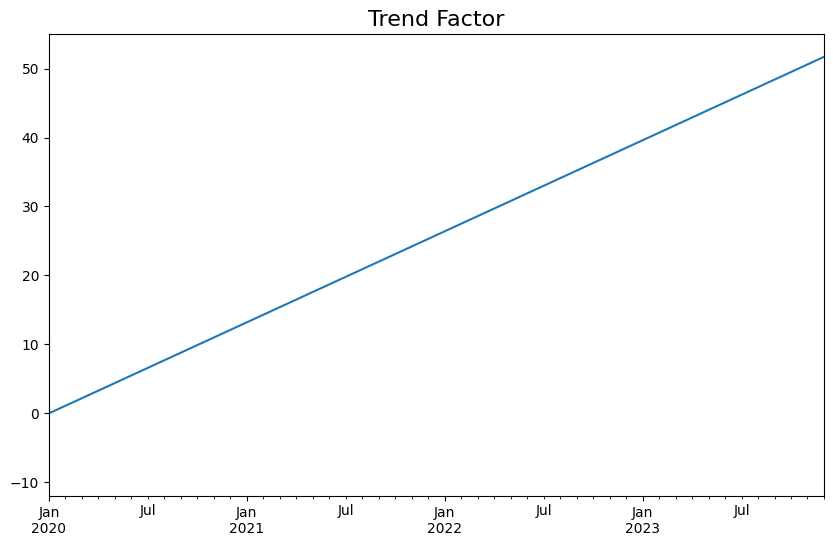

In [3]:
plt.figure(figsize=[10,6])
df.trend.plot()
plt.ylim(-12,55)
plt.title('Trend Factor', fontsize=16)
plt.show()


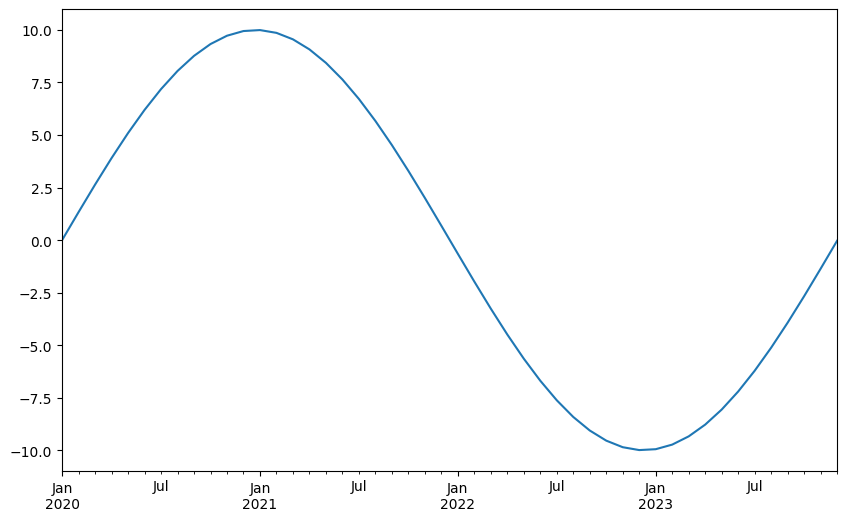

In [4]:
plt.figure(figsize=[10,6])
df.cycle.plot()
plt.show()

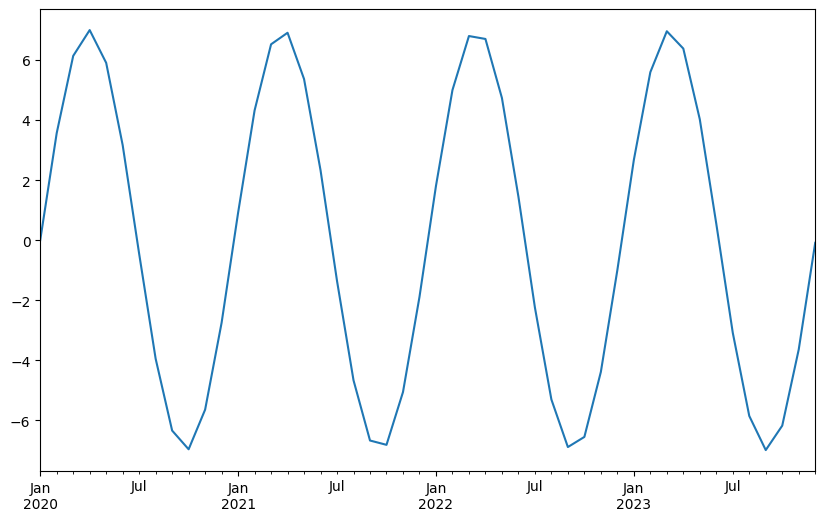

In [5]:
plt.figure(figsize=[10,6])
df.seasonal.plot()
plt.show()

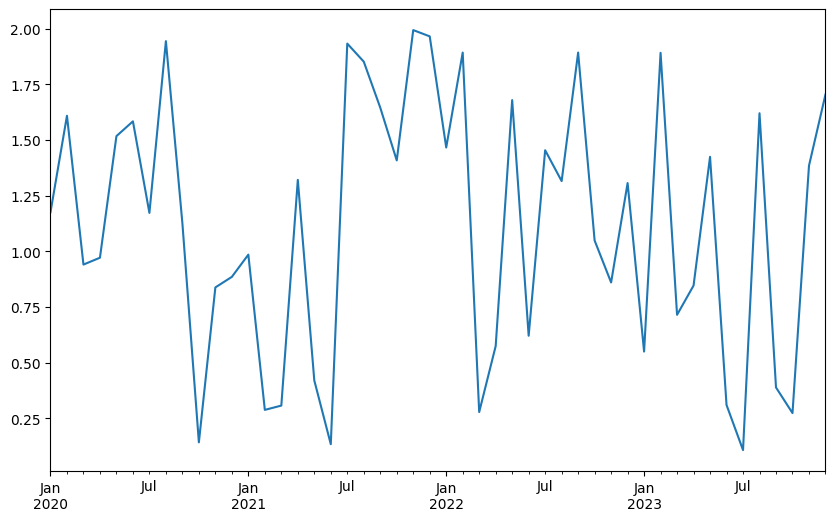

In [6]:
plt.figure(figsize=[10,6])
df.irrgular.plot()
plt.show()

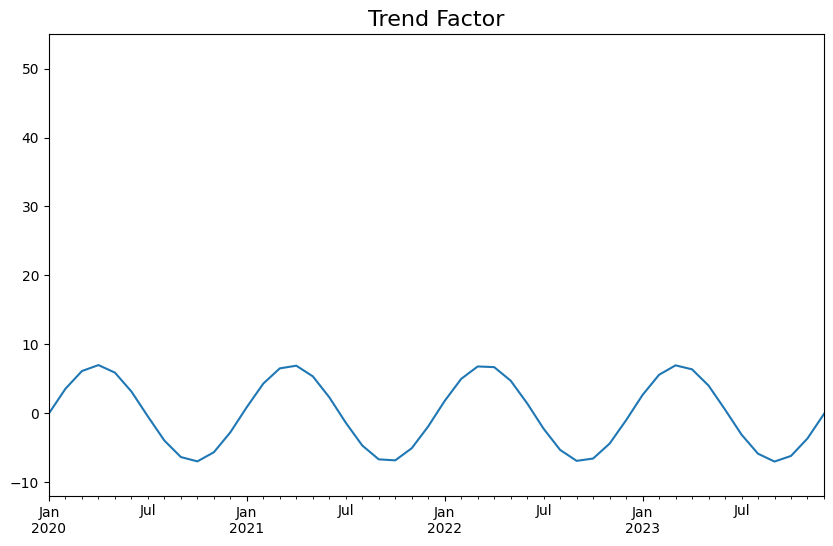

In [7]:
plt.figure(figsize=[10,6])
df.seasonal.plot()
plt.ylim(-12,55)
plt.title('Trend Factor', fontsize=16)
plt.show()

### 평활화 기법(Smoothing Methods)
Simple Moving Average (SMA)
• 단순 이동 평균은 가장 일반적인 평균 유형이다. 
• SMA에서는 최근 데이터 포인트의 합계를 수행하고 기간별로 나눈다. 
• 슬라이딩 너비의 값이 클수록 데이터가 더 평활해지지만, 값이 크면 정확도가 떨
어질 수 있다. 
• SMA를 계산하기 위해 pandas의 Series.rolling() 메서드를 사용한다

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
# 2020년 8월 부터 일요일 8개를 조회
# start : 시작일, periods : 생성할 날짜의 개수, freq : 생성할 날짜의 주기
pd.date_range(start="2020-08", periods=8, freq="W")


DatetimeIndex(['2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20'],
              dtype='datetime64[ns]', freq='W-SUN')

<AxesSubplot: >

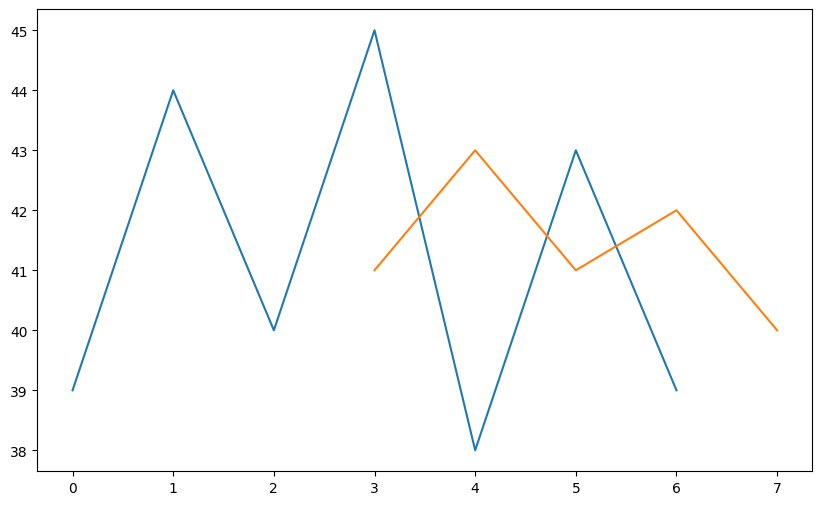

In [13]:
df = pd.DataFrame({
"week":pd.date_range(start="2020-08", periods=8, freq="W"),
"sales":[39,44,40,45,38,43,39,np.nan],
"3MA":[0]*8
})
# 0~2주차 평균을 3주차에 shift해서 적용
df["3MA"] = df[["sales"]].rolling(3).mean().shift(1)

df['sales'].plot(figsize=(10,6))
df['3MA'].plot()

Text(0.5, 1.0, 'Close Price for Apple')

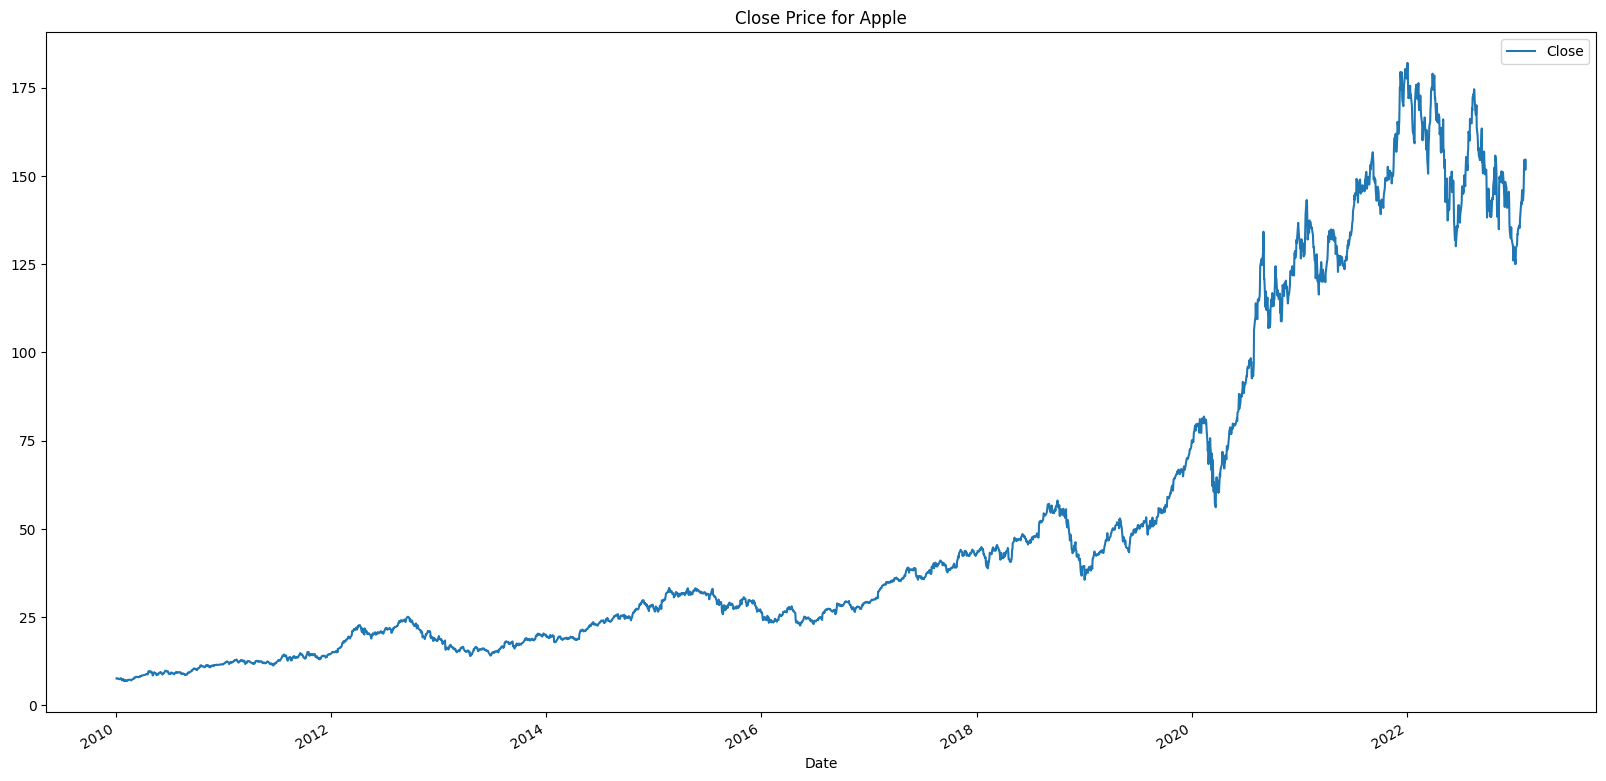

In [14]:
import FinanceDataReader as fdr
# 2010년~현재까지의 애플 주가를 데이터 프레임으로 불러오기
df_apple = fdr.DataReader('AAPL', start = '2010')
# 가장 마지막(최신)의 10일치 주가 출력
df_apple.tail(10)
df_apple[['Close']].plot(figsize=(20,10))
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean()
plt.title('Close Price for Apple')


### Exponential Moving Average (EMA),지수평활화기법
• EMA는 새로운 데이터에 더 많은 가중치를 부여하여 최근 데이터에 더욱 초점을 맞
춘다.
• EMA의 주요 아이디어는 이전 데이터보다 최근 데이터를 더 선호하는 것이다.
• 데이터가 오래될수록 데이터에 할당된 가중치가 줄어듭니다. 이 때문에 EMA는 모
든 값에 동일한 가중치가 주어지는 SMA에 비해 추세 변화에 더 민감하다.
• SMA를 계산하기 위해 pandas의 pandas.Series.ewm() 메서드를 사용한다

* df.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True,ignore_na=False, axis=0, times=None,method='single’)

<AxesSubplot: xlabel='index'>

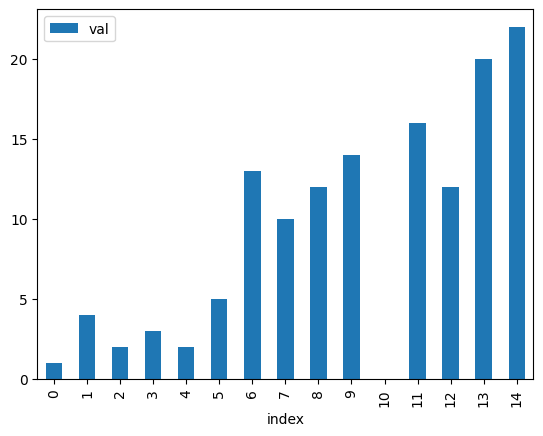

In [17]:
import pandas as pd
data = {'val':[1,4,2,3,2,5,13,10,12,14,np.NaN,16,12,20,22]} 
df = pd.DataFrame(data).reset_index()
# df['val'].plot.bar(rot=0, subplots=True)
df.plot(kind='bar',x='index',y='val')


<AxesSubplot: >

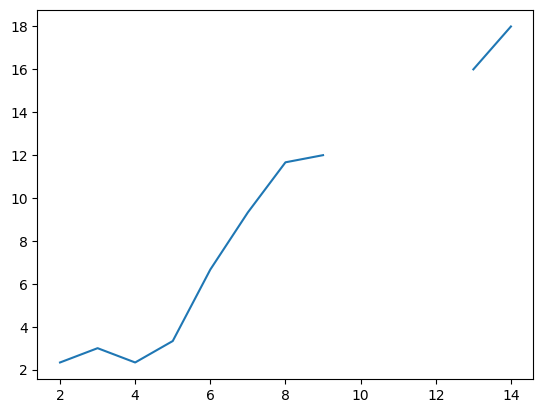

In [26]:
df["val"].rolling(window=3).mean().plot()

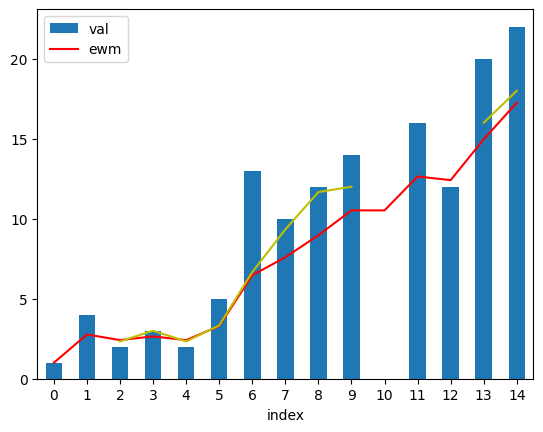

In [33]:
import matplotlib.pyplot as plt
df2 = df.assign(ewm=df['val'].ewm(alpha=0.3).mean()) # val열에 ewm 메서드적용 후 df에 추가
ax = df.plot(kind='bar',x='index',y='val') # ax에 df의 bar chart 생성
ax2= df2.plot(kind='line',x='index', y='ewm', color='red', ax=ax) # ax2에 df2의 line chart 생성후 ax에 추가
df["val"].rolling(window=3).mean().plot(x='index', y='3ma',color = "y")
plt.show() # 그래프 출력


### 자기상관과 부분 자기상관

* 자기상관함수(ACF; AutoCorrelation Function)

- 자기상관은 다른 시점의 관측값 간 상호 연관성을 나타내므로 이는 시차를 적용한 시계열 데이터 간의 상관관계를 의미

- 자기상관은 원래의 시계열 데이터와 k 시차가 고려된 즉 k기간 뒤로 이동한 시계열 데이터간의 상관관계로 정의된다

- 시차에 따른 일련의 자기상관을 자기상관함수(ACF)라고한다

- ACF는 시차에 따른 관측값 간의 연관 정도를 보여주며 시차가 커질수록 ACF는 점차 0에 가까워진다

- 정상시계열 데이터의 ACF는 상대적으로 빨리 0에 접근한다. 비정상시계열 데이터는 ACF가 천천히 감소하여 종종 큰 양의 값을 가진다


* 편자기 함수 

- 편자기상관은 시차가 다른 두 시계열데이터 간 순순한 연관성을 말한다

- 편자기상관은 원래의 시계열 데이터와 시차 K 시계열 데이터 간의 순수한 상관관계로서 두 시점 사이에 포함된 모든 시계열 데이터의 영향은 제거된다

- 시차에 따른 일련의 편자기상관을 편자기함수(PACF)라고 한다

- ACF와 PACF를 이용해 시계열 데이터의 정상성을 평가 할 수 있다

- 변동폭이 크면 로그 변환이나 스탠다드스케일링을 통해 정상 시계열로 변환이 가능하다

- 추세나 계절적 요인이 관찰되면 차분 과정을 통해 정상 시계열로 변환이 가능하다

- 위의 두가지 경우가 다 관찰될 경우에는 로그(OR Z스케일링)과 차분과정 둘 다 거치면 정상 시계열로 변환이 가능하다

▪ 정상성
• 정태성이라고도 하며, 일정하여 늘 한결같은 성질을 뜻한다.
• 시계열에서 정상성이 있다는 것은 추세나 동향이 없는 상태로, 시계열의 평균이
시간 축에 평행하다는 의미다.
• 시계형 자료가 시계열 모형으로 적합시키기 위한 전제 조건에 해당한다. 즉, 추세
와 동향이 있는 상태로는 모형을 만들 수 없다.(다루기가 어렵다


▪ 차분
• 차분은 현시점 자료에서 전 시점 자료를 빼는 것을 말한다.
• 일반차분(regular difference)는 바로 전 시점의 자료를 빼는 것이고, 계절차분
(seasonal difference)는 여러 시점 전의 자료를 빼는 것이다


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
## getting drug sales dataset
file_path = "https://raw.githubusercontent.com/selva86/datasets/master/a10.csv"
df = pd.read_csv(file_path, parse_dates=['date'], index_col='date') 
df.head(12)


,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
1991-12-01,4.306371
1992-01-01,5.088335
1992-02-01,2.814520
1992-03-01,2.985811


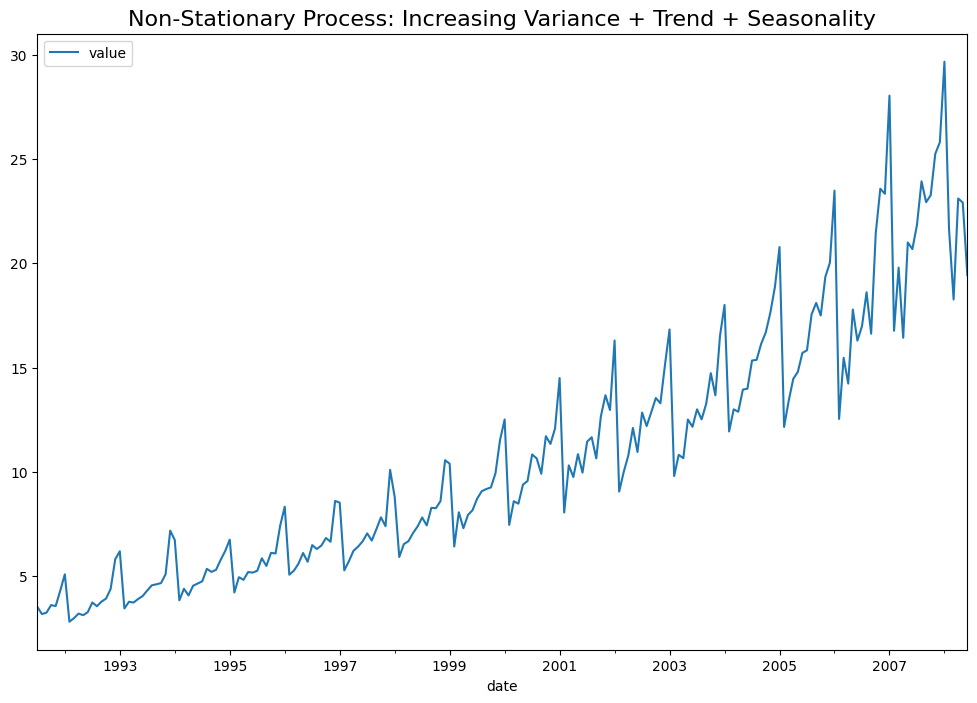

In [42]:
df.plot(figsize=[12, 8]) 
plt.title('Non-Stationary Process: Increasing Variance + Trend + Seasonality', 
fontsize=16) 
plt.show()


In [43]:
## Variance Stabilizing Transformation (VST) by Taking Logarithm
df_vst = np.log(df.value) 
df_vst.head()


date
1991-07-01    1.260332
1991-08-01    1.157161
1991-09-01    1.179338
1991-10-01    1.283986
1991-11-01    1.271408
Name: value, dtype: float64

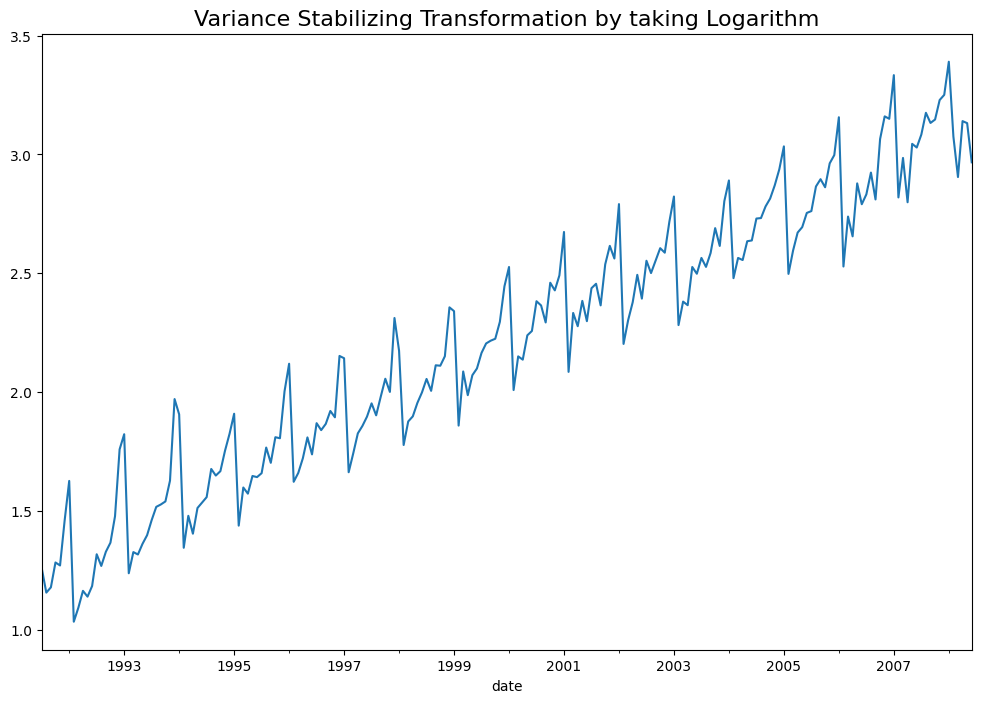

In [44]:
## plotting 
df_vst.plot(figsize=(12, 8)) 
plt.title("Variance Stabilizing Transformation by taking Logarithm", fontsize=16) 
plt.show()